# Importing the modules

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Activation, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

# Organizing data in the local disk

In [3]:
# organize data into train,valid, test dirs

os.chdir('D:/data/Dogs_cats/train')
if os.path.isdir('train1/dog') is False:
    os.makedirs('train1/dog')
    os.makedirs('train1/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train1/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train1/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')

os.chdir('C:/Users/sdeva/Programs')

In [6]:
train_path = 'D:/data/Dogs_cats/train/train1'
valid_path = 'D:/data/Dogs_cats/train/valid'
test_path = 'D:/data/Dogs_cats/train/test'

# Creating generators

In [67]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory= train_path, target_size=(224,224),classes=['cat','dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory= valid_path, target_size=(224,224),classes=['cat','dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory= test_path, target_size=(224,224),classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [68]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [69]:
imgs, labels = next(train_batches)

In [70]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

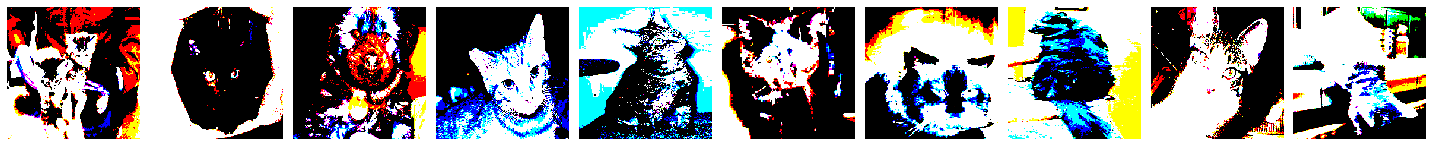

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [71]:
plotImages(imgs)
print(labels)

# Building the model

In [72]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation ='relu', padding = 'same', input_shape=(224,224,3)), \
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 244, 244, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 476290    
Total params: 495,682
Trainable params: 495,682
Non-trainable params: 0
________________________________________________

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 26s - loss: 29.8900 - acc: 0.5590 - val_loss: 6.8089 - val_acc: 0.5750
Epoch 2/10
100/100 - 25s - loss: 2.1160 - acc: 0.7400 - val_loss: 3.1517 - val_acc: 0.6000
Epoch 3/10
100/100 - 24s - loss: 0.4580 - acc: 0.8990 - val_loss: 2.3767 - val_acc: 0.6200
Epoch 4/10
100/100 - 24s - loss: 0.0702 - acc: 0.9750 - val_loss: 2.7196 - val_acc: 0.6250
Epoch 5/10
100/100 - 24s - loss: 0.0150 - acc: 0.9940 - val_loss: 2.3958 - val_acc: 0.6500
Epoch 6/10
100/100 - 24s - loss: 0.0190 - acc: 0.9930 - val_loss: 2.2240 - val_acc: 0.6400
Epoch 7/10
100/100 - 24s - loss: 0.0076 - acc: 0.9990 - val_loss: 2.1755 - val_acc: 0.6700
Epoch 8/10
100/100 - 24s - loss: 9.7601e-04 - acc: 1.0000 - val_loss: 2.2353 - val_acc: 0.6550
Epoch 9/10
100/100 - 24s - loss: 6.2978e-04 - acc: 1.0000 - val_loss: 2.2231 - val_acc: 0.6600
Epoch 10/10
100/100 - 24s - loss: 5.2533e-04 - acc: 1.0000 - val_loss: 2.2311 - val_acc: 0.6650


# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

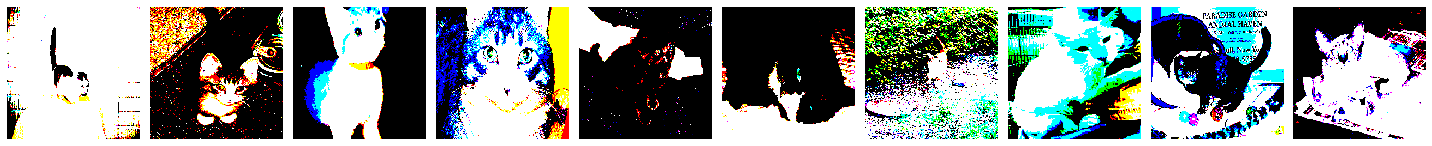

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [50]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [52]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
predictions = model.predict(x=test_batches, verbose=0)

In [55]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [56]:
confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

array([[35, 15],
       [26, 24]], dtype=int64)

# Fine tuned vgg16 model

In [57]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 31s 0us/step


In [58]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [74]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [75]:
for layer in model.layers:
    layer.trainable = False

In [76]:
model.add(Dense(units=2,activation='softmax'))

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train the fine tuned vgg16 model

In [78]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 106s - loss: 0.2616 - acc: 0.8870 - val_loss: 0.0849 - val_acc: 0.9750
Epoch 2/5
100/100 - 108s - loss: 0.0908 - acc: 0.9700 - val_loss: 0.0695 - val_acc: 0.9750
Epoch 3/5
100/100 - 113s - loss: 0.0609 - acc: 0.9790 - val_loss: 0.0481 - val_acc: 0.9750
Epoch 4/5
100/100 - 114s - loss: 0.0432 - acc: 0.9870 - val_loss: 0.0432 - val_acc: 0.9750
Epoch 5/5
100/100 - 114s - loss: 0.0317 - acc: 0.9900 - val_loss: 0.0390 - val_acc: 0.9800


# Predict using fine tuned vgg16 model

In [80]:
predictions = model.predict(x=test_batches, verbose=0)

In [82]:
test_batches .classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
confusion_matrix(y_true=test_batches.classes, y_pred =np.argmax(predictions,axis=-1))

array([[48,  2],
       [ 1, 49]], dtype=int64)